# Monte Carlo Simulation

The Monte Carlo Simulation is used to model the probability of different outcomes in a process that cannot be easily predicted. It involves repeated sampling to obtain results.They are used to predict situations where processes where 
random variables could affect the outcome. This can then be used to further the risk involved in such a process. It can be deduced herein that this technique could be useful for the estimation of 
stochastic processes. It is a widely implemented approach and can be used to explain biological,physical or even chemical systems. An example of this can be seen from the [article](https://www.sciencedirect.com/science/article/pii/S0378437121002867) where a Monte Carlo Simulation was used to explain the proximity based infection of the COVID-19 Virus. In this case, I will be looking to explore how to use this technique to simulate a stock portfolio value over a certain period 

The stocks to be simulated are MatterPort Inc ([MTTR](https://finance.yahoo.com/quote/MTTR)) ,Palantir Technologies ([PLTR](https://finance.yahoo.com/quote/PLTR)) Persimmon Plc ([PSN.L](https://finance.yahoo.com/quote/PSN.L))



## Importing the libraries

In [ ]:

import yfinance as yf
import datetime as dt


## Get the data from the Yahoo Finance API

In [13]:
stocks = ['MTTR', 'PLTR', 'PSN.L']
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=100)
stockInfo = yf.download(stocks, start=startDate, end=endDate)['Adj Close']  
returns = stockInfo.pct_change()
mean_returns = returns.mean()
covariance_matrix = returns.cov()


[*********************100%***********************]  3 of 3 completed


# Define the Weights


In [14]:
import numpy as np
weights = np.random.random(len(mean_returns))
weights /= np.sum(weights)
no_of_simulations = 400
t_in_days = 100

meanM = np.full(shape=(t_in_days, len(weights)), fill_value=mean_returns)
meanM = meanM.T

# Simulate the portfolio

In [15]:
portfolio_simulations = np.full(shape=(t_in_days, no_of_simulations), fill_value=0.0)
initialPortfolio = 10000
for m in range(0, no_of_simulations):
    Z = np.random.normal(size=(t_in_days, len(weights)))
    #Cholesky decomposition to Lower Triangular Matrix
    L = np.linalg.cholesky(covariance_matrix)
    dailyReturns = meanM + np.inner(L, Z) 
    #Correlated daily returns for individual stocks
    portfolio_simulations[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

# Draw the simulations

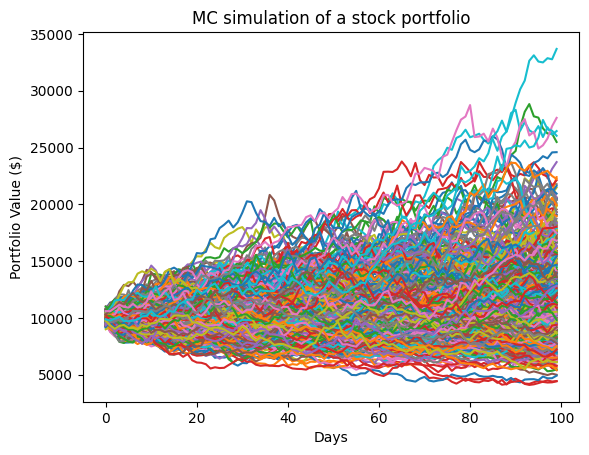

In [16]:
import matplotlib.pyplot as plt
plt.plot(portfolio_simulations)
plt.ylabel('Portfolio Value')
plt.xlabel('Days')
plt.title('Monte Carlo simulation of a 3 stocks')
plt.show()